<a href="https://colab.research.google.com/github/ovllya126/UTS_ML2019_ID13307095/blob/master/A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
import requests

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

import seaborn as sns;
sns.set()

from sklearn import preprocessing
from google.colab import files



In [18]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/steam_training.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,10000000-20000000
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,5000000-10000000
2,3,Day of Defeat,1/5/03,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,5000000-10000000
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,5000000-10000000
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,5000000-10000000


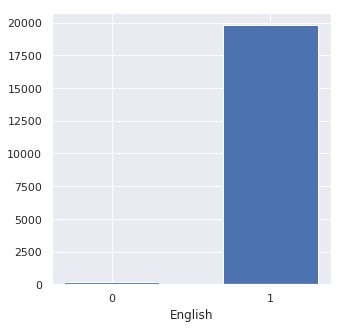

In [8]:
#attributes exploration
#plot 'english'

plt.figure(figsize=(5,5))
bins = np.arange(3) - 0.5
plt.hist(st.english, bins, rwidth = 0.6)

plt.xticks([0,1])
plt.xlabel('English')
plt.show()

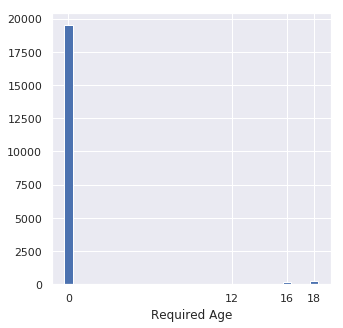

In [11]:
#plot 'required_age'
plt.figure(figsize=(5,5))
bins = np.arange(20) - 0.5
plt.hist(st.required_age, bins, rwidth = 0.6)

plt.xticks([0,12,16,18])
plt.xlabel('Required Age')
plt.show()

In [12]:
st.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,20000.000000,20000.00000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,0.98935,0.412900,41.388900,1.328045e+03,277.766900,196.116900,189.219350,6.605311
std,5773.647028,0.10265,2.587614,317.345084,2.208055e+04,4981.099289,2098.406866,2687.030391,7.885331
min,1.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5000.750000,1.00000,0.000000,0.000000,1.100000e+01,4.000000,0.000000,0.000000,1.990000
50%,10000.500000,1.00000,0.000000,9.000000,4.000000e+01,15.000000,0.000000,0.000000,4.790000
75%,15000.250000,1.00000,0.000000,25.000000,2.040000e+02,66.000000,30.250000,31.250000,7.990000
max,20000.000000,1.00000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.000000,303.990000


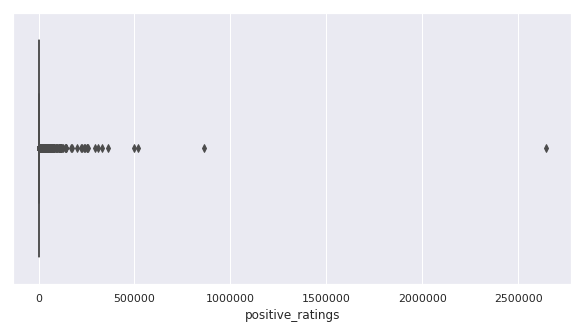

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(st.positive_ratings)

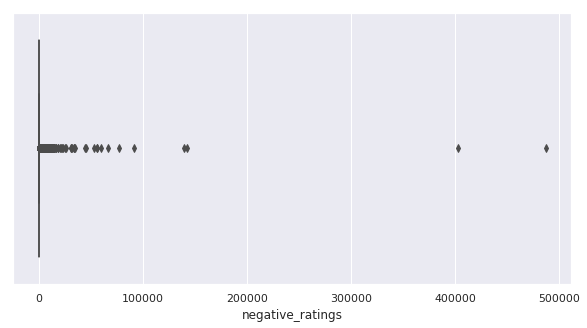

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(st.negative_ratings)

Text(0, 0.5, 'number')

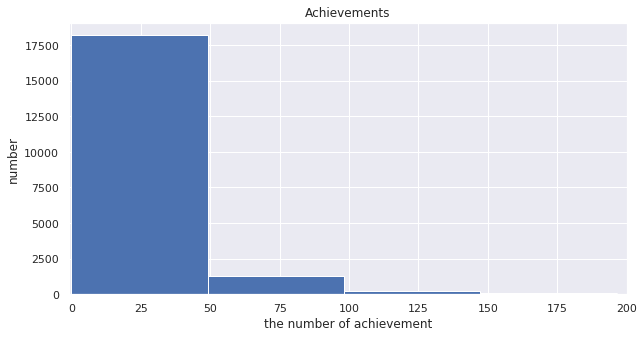

In [12]:
plt.figure(figsize=(10,5))
plt.hist(st.achievements,bins=200)
plt.xlim(right = 200)
plt.xlim(left = -1)
plt.title("Achievements")
plt.xlabel("the number of achievement")
plt.ylabel("number")

Text(0, 0.5, 'number')

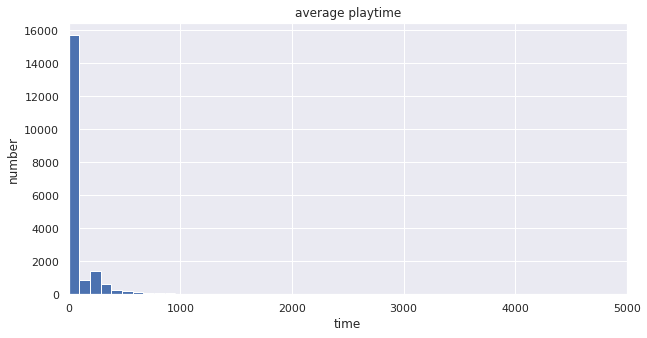

In [13]:
plt.figure(figsize=(10,5))
plt.hist(st.average_playtime,bins=2000)
plt.xlim(right = 5000)
plt.xlim(left = -1)
plt.title("average playtime")
plt.xlabel("time")
plt.ylabel("number")

Text(0, 0.5, 'number')

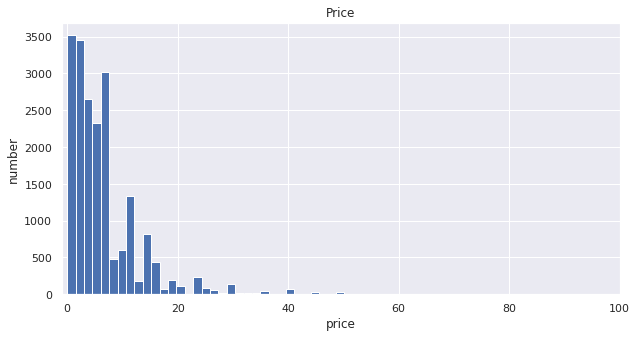

In [17]:
plt.figure(figsize=(10,5))
plt.hist(st.price,bins=200)
plt.xlim(right = 100)
plt.xlim(left = -1)
plt.title("Price")
plt.xlabel("price")
plt.ylabel("number")


In [0]:
def enco(data):
  reshape_data = data.to_numpy().reshape(-1,1)
  enc = preprocessing.OrdinalEncoder().fit(reshape_data)
  return enc.transform(reshape_data)

In [0]:
st.platforms = enco(st.platforms)
st.owners = enco(st.owners)

In [8]:
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners
0,1,Counter-Strike,1/11/00,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,7.19,3.0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,3.99,11.0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,5.0,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,3.99,11.0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,3.99,11.0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5.0,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,3.99,11.0


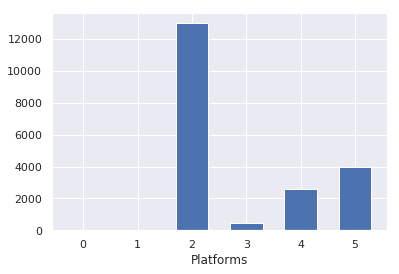

In [18]:
#plot 'platforms'
bins = np.arange(7) - 0.5
plt.hist(st.platforms, bins, rwidth = 0.6)

plt.xticks([0,1,2,3,4,5])
plt.xlabel('Platforms')
plt.show()

In [40]:
def cg_class(name,cg):
  st[name] = 0
  for i in range(0,19999):
    if cg in st.categories[i]:
      st[name][i] = 1

cg_class('Player', 'Multiplayer')
cg_class('VAC', 'Valve Anti-Cheat enabled')
cg_class('STC', 'Steam Trading Cards')
cg_class('PCS', 'Partial Controller Support')
cg_class('ISS', 'Includes Source SDK')
cg_class('Cloud', 'Steam Cloud')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
def genres_class(name,genres):
  st[name] = 0
  for i in range(0,19999):
    if genres in st.genres[i]:
      st[name][i] = 1

genres_class('Action', 'Action')
genres_class('Free', 'Free to Play')
genres_class('Strategy', 'Strategy')
genres_class('Adventure', 'Adventure')
genres_class('Indie', 'Indie')
genres_class('RPG', 'RPG')
genres_class('Casual', 'Casual')
genres_class('Racing', 'Racing')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [0]:
def scaler(data):
  reshape_data = data.to_numpy().reshape(-1,1)
  return preprocessing.MinMaxScaler().fit_transform(reshape_data)

In [0]:
st.positive_ratings = scaler(st.positive_ratings)
st.negative_ratings = scaler(st.negative_ratings)
st.average_playtime = scaler(st.average_playtime)
st.median_playtime = scaler(st.median_playtime)
st.price = scaler(st.price)

In [2]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/st_modified3.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,owners,players,VAC,STC,PCS,ISS,cloud,Player,Cloud,Action,Free,Strategy,Adventure,Indie,RPG,Casual,Racing
0,1,Counter-Strike,1/11/00,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.047093,0.006855,0.092391,0.001663,0.023652,10000000-20000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.001255,0.001300,0.001453,0.000325,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,5,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,0.001292,0.000817,0.000981,0.000178,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,5,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.000481,0.000548,0.001353,0.000965,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,5,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,0.001985,0.000591,0.003273,0.002177,0.013125,5000000-10000000,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [25]:
st.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms           float64
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings      int64
negative_ratings      int64
average_playtime      int64
median_playtime       int64
price               float64
owners              float64
dtype: object

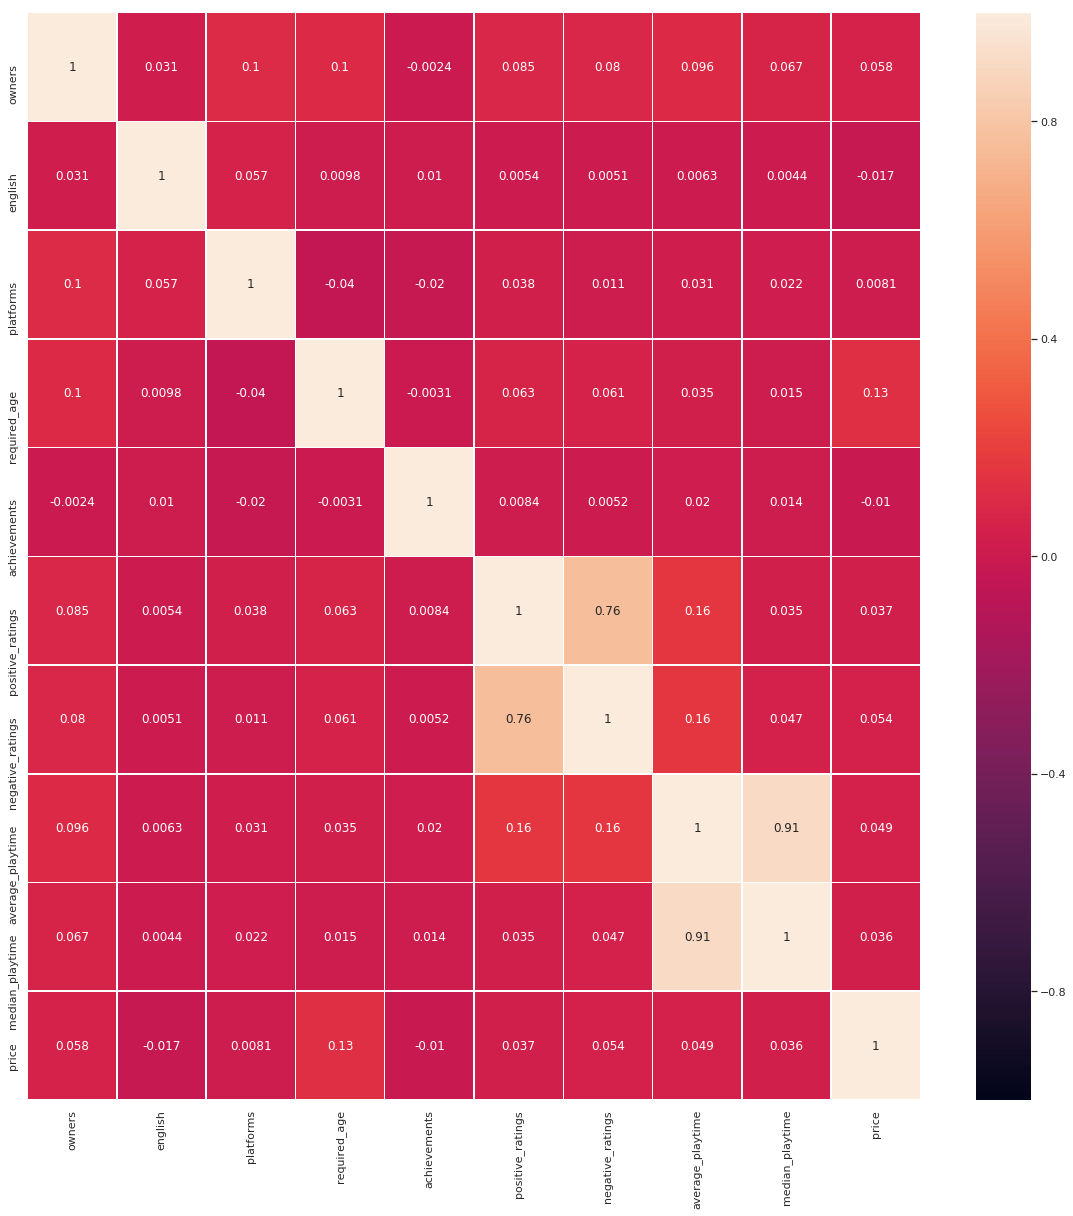

In [26]:

cols = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price' ]

selected_st = np.corrcoef(st[col].values.T)
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(selected_st, vmin=-1, vmax=1,annot=True, linewidths=.5, xticklabels=col ,yticklabels = col)

heatmap.figure.savefig('heatmap.png')

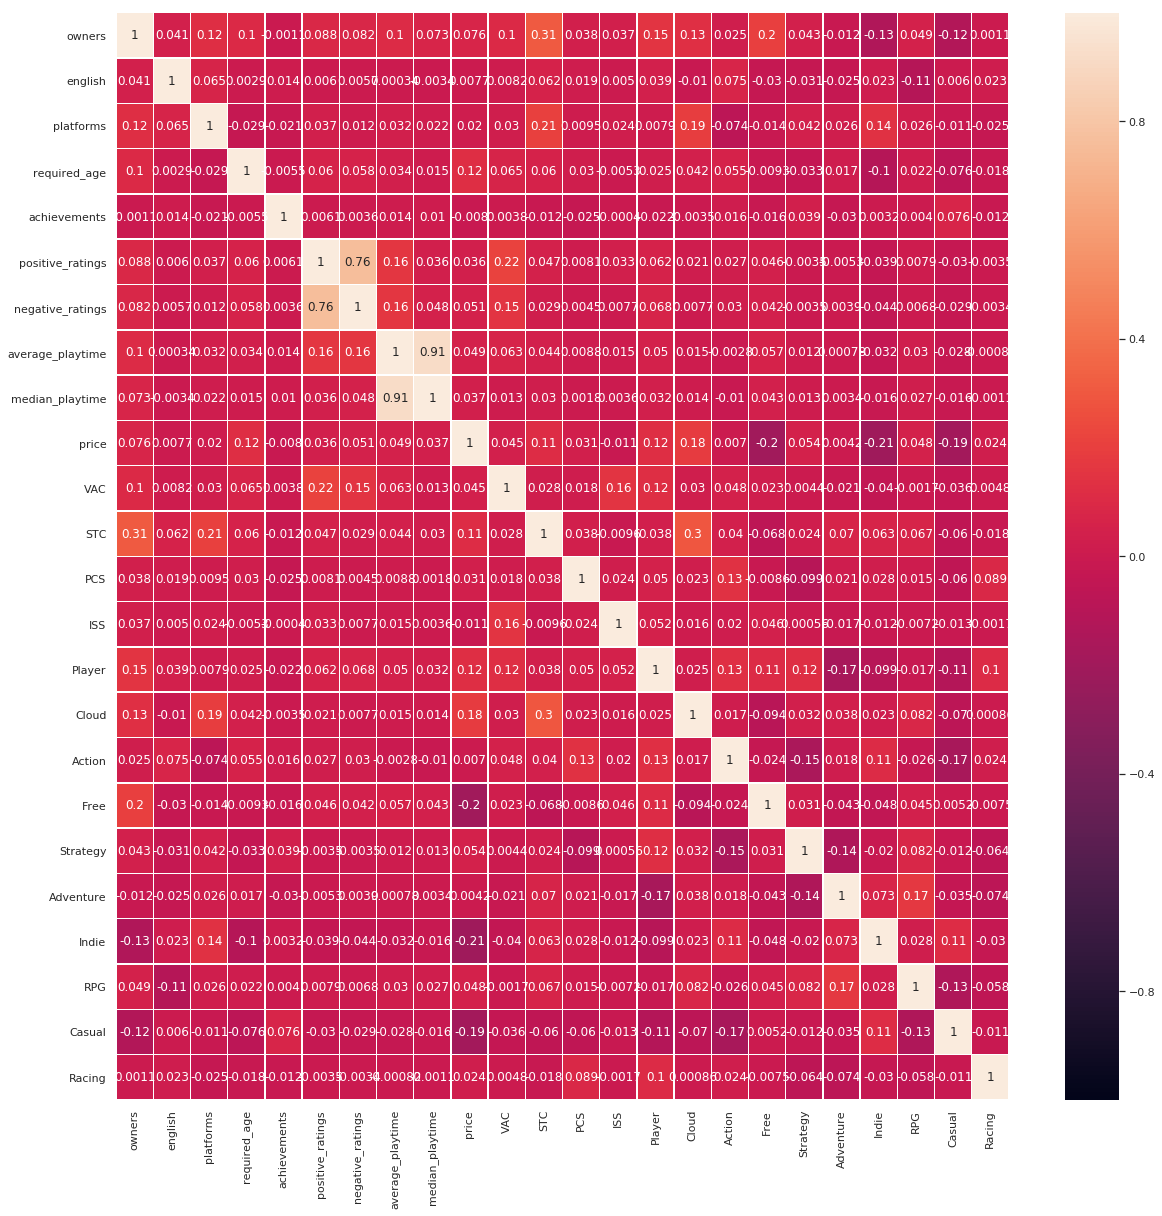

In [3]:
st_corr = st.corr()

col = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 'VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing' ]

selected_st = np.corrcoef(st[col].values.T)
plt.figure(figsize=(20,20))  
heatmap = sns.heatmap(selected_st, vmin=-1, vmax=1,annot=True, linewidths=.5, xticklabels=col ,yticklabels = col)

heatmap.figure.savefig('heatmap.png')

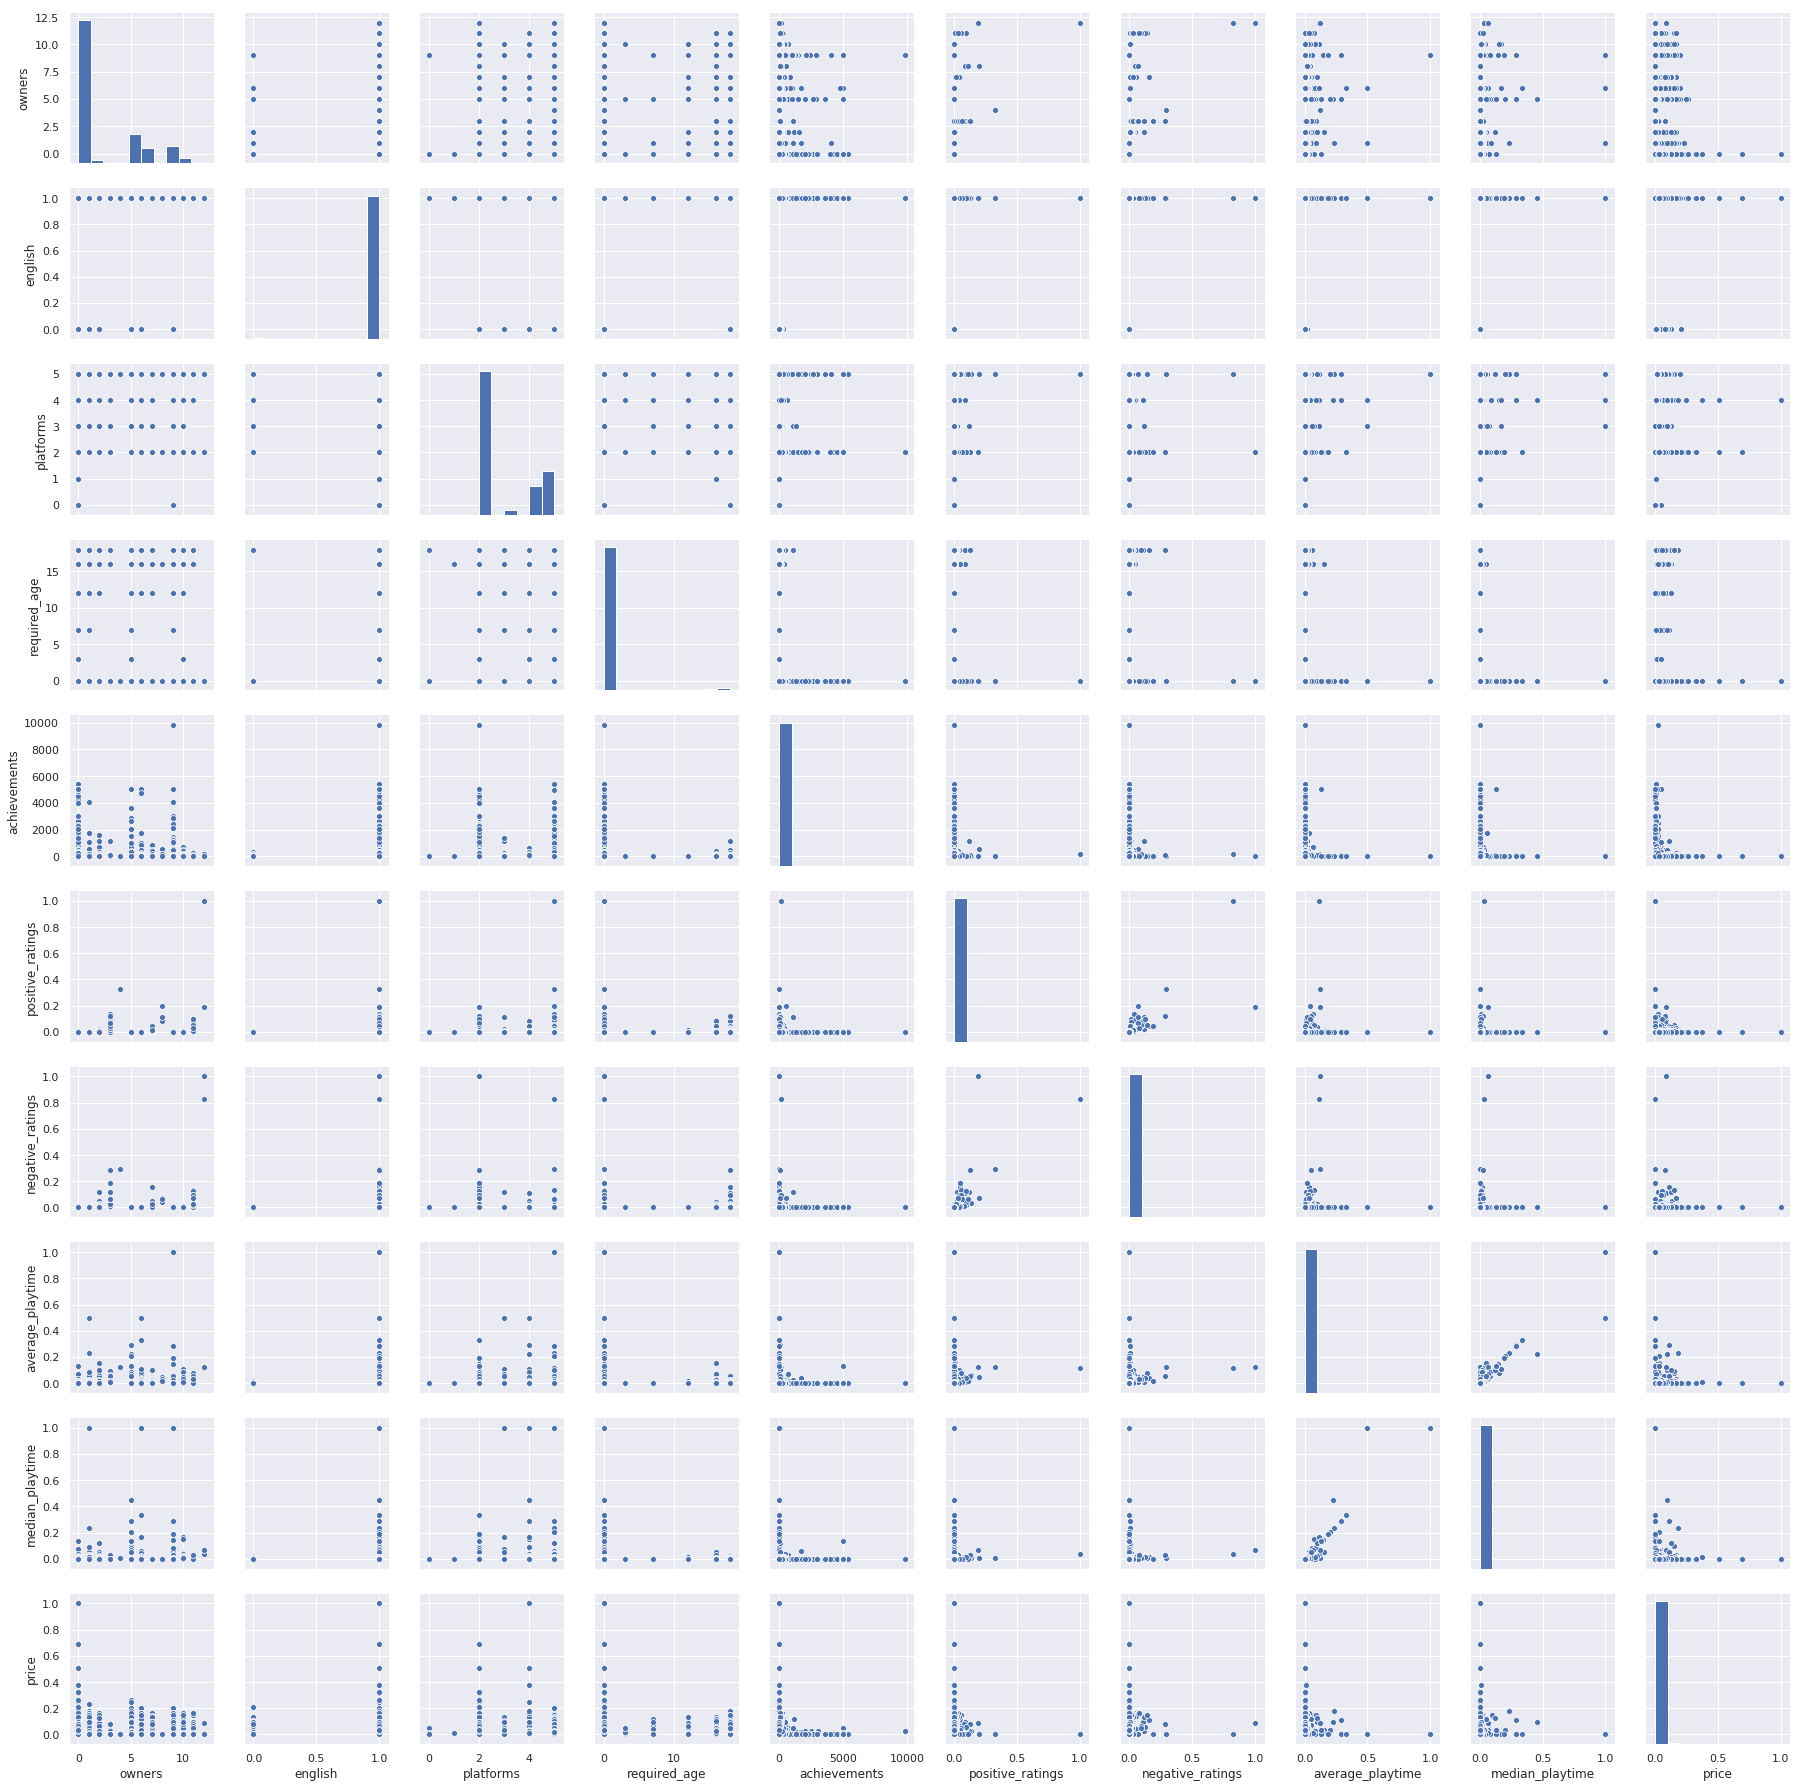

In [13]:
col1 = ['owners','english','platforms',	'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price']
pairs1 = sns.pairplot(st[col1])



In [0]:
pairs1.savefig('pairs.png')

In [0]:


files.download('heatmap.png')

In [0]:
# import os

# print(os)
# print(os.getcwd())

# print(os.listdir(os.getcwd()))


# st.to_csv('st_modified1.csv')


In [0]:
st.to_csv('st_modified2.csv')

In [0]:
from google.colab import files

files.download('st_modified2.csv')


In [0]:
files.download('pairs.png')

# Modeling

In [0]:
# Environment and constant preparation
%matplotlib inline
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
try:
    import plotly.graph_objects as go
except:
    !pip install plotly==4.1.0
import matplotlib.pyplot as plt
import torchvision.datasets as cvdata
import torchvision.transforms as transforms
from pathlib import Path
import torch


COLAB = True


In [0]:
DATA_FOLDER = Path("./data").absolute()
DATA_FOLDER.mkdir(parents=True, exist_ok=True)
DATA_FOLDER = str(DATA_FOLDER)
IRIS_EXPERIMENT_X_SPACE_QUANTISATION_BIN_NUM = 50 # self-interpretation

In [187]:
# Defining processing functions
def feature_maker_overall_green(X):
    return X[:, 1].reshape(X.shape[0], -1).sum(axis=1)

def feature_maker_overall_blue(X):
    return X[:, 2].reshape(X.shape[0], -1).sum(axis=1)

def take_a_separable_subset(X, y, original_indexes):
    from sklearn.linear_model import LogisticRegression
    lr = LogisticRegression()
    lr.fit(X, y)
    pred = lr.predict(X)
    pred_prob = lr.predict_log_proba(X_train)
    confident_ind = np.logical_or(pred_prob[:, 0] > np.log(0.55),
                                  pred_prob[:, 1] > np.log(0.55))
    ind = np.logical_and(confident_ind, pred==y)
    X_simple = X[ind]
    y_simple = y[ind]
    original_indexes_simple = original_indexes[ind]
    return X_simple, y_simple, original_indexes_simple

def prepare_cifar_two_class_data(
    X, y, original_indexes,
    simple=False,
    train_size=1000,
    make_feature_1=feature_maker_overall_green, 
    make_feature_2=feature_maker_overall_blue):
    feature1 = make_feature_1(X)
    feature2 = make_feature_2(X)
    X = np.stack([feature1, feature2], axis=1)
    # normalise to -1 to +1
    X -= X.min(axis=0)
    X /= X.max(axis=0)
    X -= 0.5
    X *= 2.0
    
    X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, 
                         train_size=train_size, test_size=len(y)-train_size)
    return X_train, X_test, y_train, y_test, ind_train, ind_test

def prepare_cifar_two_class_separable_data(
    X, y, original_indexes, train_size=100):
    
    X_simple, y_simple, indexes_simple = \
        take_a_separable_subset(X, y, original_indexes)
    
    X_train_simple, X_test_simple, \
    y_train_simple, y_test_simple, \
    ind_train_simple, ind_test_simple = \
        train_test_split(X_simple, y_simple, indexes_simple, 
                         train_size=train_size, test_size=len(y_simple)-100)
    return X_train_simple, X_test_simple, \
        y_train_simple, y_test_simple, \
        ind_train_simple, ind_test_simple
    
X_train, X_test, y_train, y_test, ind_train, ind_test = \
    prepare_cifar_two_class_data(X, y, indexes)
X_train_simple, X_test_simple, \
y_train_simple, y_test_simple, \
ind_train_simple, ind_test_simple = prepare_cifar_two_class_separable_data(
    X_train, y_train, ind_train)

def quick_separable_train_sample(n=100):
    X_train_simple, X_test_simple, \
    y_train_simple, y_test_simple, \
    ind_train_simple, ind_test_simple = prepare_cifar_two_class_separable_data(
        X_train, y_train, ind_train, train_size=n)
    
    
    return X_train_simple, y_train_simple, ind_train_simple

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [0]:
# Defining vis-functions
def show_cifar_image(img_id):
    npimg = ((cifar_trainset[img_id][0].detach().numpy() + 1.0) \
        * 128).astype(np.uint8).transpose((1, 2, 0))
    # plt.imshow(npimg, interpolation='nearest') # for larger view
    return Image.fromarray(npimg), npimg

def encode_sample_image(index):
    """
    Generate the resource url to display an image in a webpage.
    This is not used in notebooks. But you can take the function
    in a standalone Python program as a web-server to visual data models.
    """
    import base64
    from io import BytesIO

    pil_img = Image.fromarray(((cifar_trainset[index][0].numpy()
                                .transpose([1, 2, 0]) + 1.0) * 128).astype(np.uint8))
    buff = BytesIO()
    pil_img.save(buff, format="JPEG")
    new_image_string = base64.b64encode(buff.getvalue()).decode("utf-8")
    # print(new_image_string[:100])
    return """<img src="data:image/png;base64,""" \
        + """"></img>"""

def show_perceptron_model(model, X_train, y_train, indexes_train=[]):
    layout = go.Layout(
        xaxis=go.layout.XAxis(
            range=[-1, 1],
            showgrid=True,
            zeroline=True,
            showline=True,
            gridcolor='#bdbdbd',
            gridwidth=1,
            zerolinecolor='#969696',
            zerolinewidth=2,
            linecolor='#636363',
            linewidth=2,
            mirror=True,
        ),
        yaxis=go.layout.YAxis(
            range=[-1, 1],
            showgrid=True,
            zeroline=True,
            showline=True,
            gridcolor='#bdbdbd',
            gridwidth=1,
            zerolinecolor='#969696',
            zerolinewidth=2,
            linecolor='#636363',
            linewidth=2,
            mirror=True,
       ),
       height=600,
       width=600,
    )

    # visualise perceptron model on a grid
    x_grid, y_grid = np.meshgrid(np.arange(-1, 1.01, 0.05), np.arange(-1, 1.01, 0.05))
    grid_X = np.stack(( x_grid.flatten(), y_grid.flatten()) ).T
    grid_pred = model.predict(grid_X)
    train_pred = model.predict(X_train)
    train_error_num = (train_pred.astype(np.int) != y_train.astype(np.int)).sum()
    E_in = train_error_num / len(y_train)

    scatter_grid = go.Scatter(
        x=grid_X[:, 0], y=grid_X[:, 1], 
        marker=dict(
            size=6,
            cmax=1,
            cmin=-1,
            line_width=1,
            color=grid_pred,
            colorscale="Cividis",
            symbol="square",
            opacity=0.5
        ),
        mode="markers",
    #     colorscale=,
        name="'All' X Space Samples",
        hoverinfo="none")
    
    contour_grid = go.Contour(
        z=grid_pred,
        x=grid_X[:, 0], # horizontal axis
        y=grid_X[:, 1], # vertical axis
        hoverinfo="none",
        colorscale="Cividis",
        showscale=False
    )
    
    if len(indexes_train) == 0:
        scatter_train_text = ["X:({:.02f}, {:.02f})<br>y:{}, pred:{}".format(x0, x1, int(y), int(p)) 
              for (x0, x1), y, p in zip(X_train, y_train, train_pred)] 
    else:
        scatter_train_text = ["X:({:.02f}, {:.02f})<br>y:{}, pred:{}, ImgID {:d}"\
                              .format(x0, x1, int(y), int(p), i) 
                              for (x0, x1), y, p, i in zip(X_train, y_train, train_pred, indexes_train)] 
        

    scatter_train = go.Scatter(
        x=X_train[:, 0], y=X_train[:, 1],
         marker=dict(
             size=12,
             cmax=1,
             cmin=-1,
             color=y_train,
             colorscale="Cividis",
             line=dict(
                 width=2,
                 color=["green" if prediction == ground_truth else "red"
                        for prediction, ground_truth in zip(train_pred, y_train)]
             )

        ),
        mode="markers",
        name="Dataset Samples",
        text=scatter_train_text,
        hoverinfo="text")

    fig = go.Figure(
        data=[
            contour_grid, scatter_train
        ],
        layout=layout,
        layout_title_text="Two Object Class 2D Data<br>#.errors={:d}, E_in={:.3f}"\
            .format(train_error_num, E_in)
    )
    if COLAB:
        fig.show(renderer="colab")
    else:
        fig.show()

## Linear Model

In [0]:
col_x = ['english', 'platforms', 'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 'VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing' ]

X = st[col_x].values
y = st['owners'].values
original_indexes = st['appid'].values


In [0]:
train_size = 20000
X = X[:,np.newaxis,2]
X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, 
                         train_size=train_size, test_size=len(y)-train_size)

In [15]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

print(regr.coef_)

print(mean_squared_error(y_test, y_pred))

print(r2_score(y_test, y_pred))

scores = cross_val_score(regr, X_train, y_train , cv=10)
print(np.mean(scores))

[0.12861614]
9.077510714582038
0.009652212130347726
0.009676740800980499


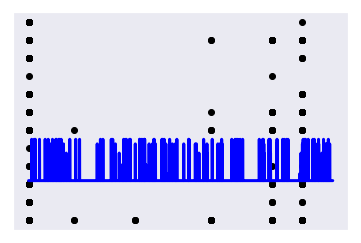

In [64]:
# Plot outputs


plt.scatter(X_test[:,np.newaxis,2, y_test,  color='black')
plt.plot(np.linspace(0, 20, 5000), y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [0]:
rid = linear_model.Ridge(alpha=.5)

rid.fit(X_train, y_train)

y_pred = rid.predict(X_test)


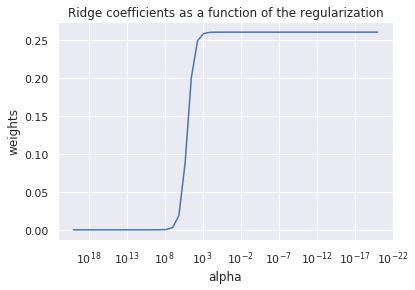

In [82]:
n_alphas = 200
alphas = np.logspace(-20, 20, 50)

coefs = []
scores = []
for a in alphas:
    rid = linear_model.Ridge(alpha=a, fit_intercept=False).fit(X_train, y_train)
    y_pred = rid.predict(X_test)
    scores.append(rid.scores)
    coefs.append(rid.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

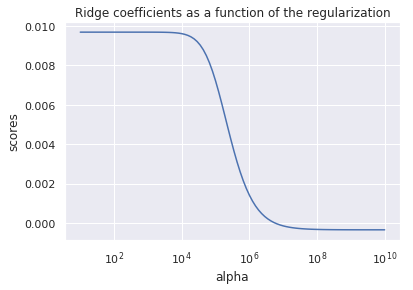

In [16]:

alphas = np.logspace(1, 10, 100)

# coefs = []
scores = []
for a in alphas:
    rid = linear_model.Ridge(alpha=a)
    rid.fit(X_train, y_train)
#     y_pred = rid.predict(X_test)
    score = cross_val_score(rid, X_train, y_train , cv=10)
    
#     score = np.sqrt(-cross_val_score(rid,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_error'))
#     score = cross_val_score(rid,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_error')
    scores.append(np.mean(score))
#     coefs.append(rid.coef_)


ax = plt.gca()
ax.plot(alphas, scores)
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('scores')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

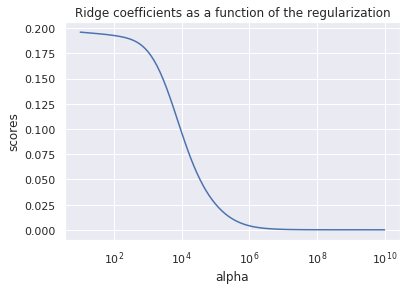

In [58]:
alphas = np.logspace(1, 10, 100)

# coefs = []
scores = []
for a in alphas:
    rid = linear_model.Ridge(alpha=a)
    rid.fit(X_train, y_train)
#     y_pred = rid.predict(X_test)
#     score = cross_val_score(rid, X_train, y_train , cv=10)
    score = rid.score(X_train, y_train)
#     score = np.sqrt(-cross_val_score(rid,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_error'))
#     score = cross_val_score(rid,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_error')
    scores.append(score)
#     coefs.append(rid.coef_)


ax = plt.gca()
ax.plot(alphas, scores)
ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('scores')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Decision Tree

In [0]:
col_x = ['english', 'platforms', 'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price']

X = st[col_x].values
y = st['owners'].values
original_indexes = st['appid'].values
train_size = 20000
X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, 
                         train_size=train_size, test_size=len(y)-train_size)

(20000, 9) (7075, 9) (20000,) (7075, 1)


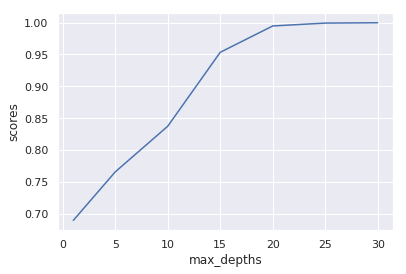

In [94]:
max_depths = [1,5,10,15,20,25,30]

scores = []
for md in max_depths:
  dt = tree.DecisionTreeClassifier(max_depth = md, min_samples_split=2,random_state=0)
#   score = cross_val_score(dt, X_train, y_train , cv = 10)
  dt.fit(X_train, y_train)
  score = dt.score(X_train, y_train)
  scores.append(score)
# dt = dt.fit(X_train, y_train)

# y_pred = dt.predict(X_test)
# dt.score(X_test,y_test)
# score = np.sqrt(-cross_val_score(dt,y_test.reshape(-1, 1),y_pred,cv=5,scoring = 'neg_mean_squared_error'))
# score = np.sqrt(-cross_val_score(dt,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_log_error'))

# score = cross_val_score(rid,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_error')
# score = cross_val_score(rid,y_test.reshape(-1, 1),y_pred,cv=10)
# score = dt.score(y_test.reshape(-1, 1),y_pred)
# print(np.mean(scores))

ax = plt.gca()
ax.plot(max_depths, scores)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

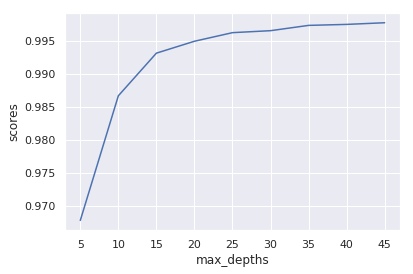

In [103]:
n_ests = [5,10,15,20,25,30,35,40,45]

scores = []
for ne in n_ests:
  rf = RandomForestClassifier(n_estimators=ne, max_depth=None,min_samples_split=2, random_state=0)
#   score = cross_val_score(rf, X_train, y_train , cv = 10)
  rf = rf.fit(X_train, y_train)
  score = rf.score(X_train, y_train)
  scores.append(np.mean(score))
  
ax = plt.gca()
ax.plot(n_ests, scores)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# y_pred = rf.predict(X_test)
# score = np.sqrt(-cross_val_score(rf,y_test.reshape(-1, 1),y_pred,cv=10,scoring = 'neg_mean_squared_error'))
# print(np.mean(scores))

0.30840886720354366

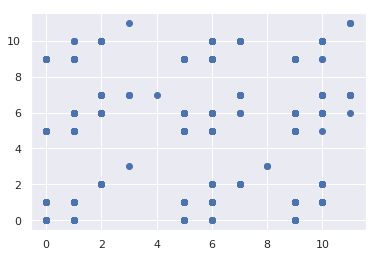

In [109]:
rf = RandomForestClassifier(n_estimators=5, max_depth=8 ,min_samples_split=2, random_state=0)
rf = rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
plt.scatter(y_test, y_pred)
r2_score(y_test, y_pred)

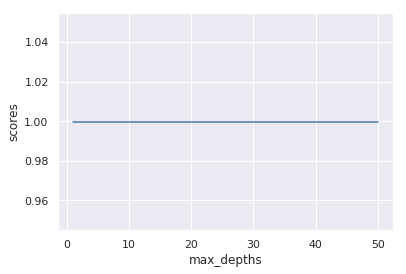

In [71]:
n_ests = [1,5,10,15,20,25,30,35,40,45,50]

scores = []

for ne in n_ests:
  et = ExtraTreesRegressor(n_estimators = ne, max_depth=None, min_samples_split=2, random_state=0)
#   scores = cross_val_score(et , X_train, y_train , cv = 10)
  et = et.fit(X_train, y_train)
  score = et.score(X_train, y_train)
  scores.append(score)
  
ax = plt.gca()
ax.plot(n_ests, scores)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()



In [25]:
print(len(n_ests),len(scores))

10 10


In [26]:
scores

array([0.75099602, 0.75860349, 0.75736395, 0.76673327, 0.75412294,
       0.74674675, 0.75350701, 0.749499  , 0.74799599, 0.75388471])

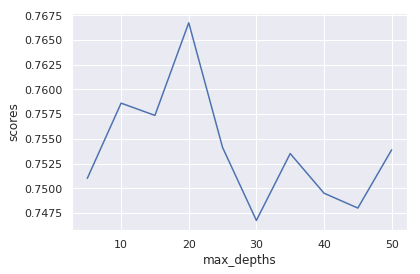

In [27]:
# print(np.mean(scores))
ax = plt.gca()
ax.plot(n_ests, scores)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

## Perceptron

In [191]:

p = Perceptron()
p.fit(X_train, y_train)
show_perceptron_model(p, X_train, y_train)

## Gradient Boosting regression

In [41]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
gbr = ensemble.GradientBoostingRegressor(**params)

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("MSE: %.4f" % mse)

MSE: 4.2317


In [48]:
rs = r2_score(y_test, y_pred)
rs

0.5357182938198721

Text(0, 0.5, 'Deviance')

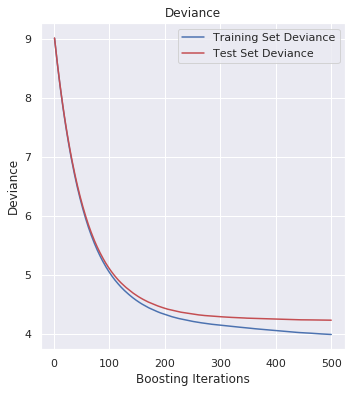

In [32]:
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(gbr.staged_predict(X_test)):
    test_score[i] = gbr.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, gbr.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

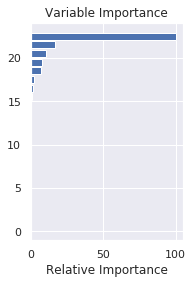

In [37]:
# Plot feature importance
feature_importance = gbr.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
# plt.yticks(pos, X_train.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [49]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01}
gbc = ensemble.GradientBoostingClassifier(**params)

gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)

acs = accuracy_score(y_test,y_pred)
acs

0.7843109540636043

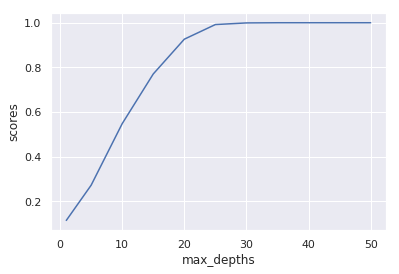

In [73]:
max_depths = [1,5,10,15,20,25,30,35,40,45,50]

scores = []

for md in max_depths:
  et = ExtraTreesRegressor(n_estimators = 10, max_depth=md, min_samples_split=2, random_state=0)
#   scores = cross_val_score(et , X_train, y_train , cv = 10)
  et = et.fit(X_train, y_train)
  score = et.score(X_train, y_train)
  scores.append(score)
  
ax = plt.gca()
ax.plot(max_depths, scores)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

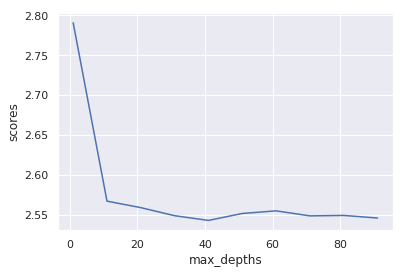

In [14]:
# n_ests = [5,10,15,20,25,30,35,40,45]
n_ests = []
scores = []
for ne in range(1,100,10):
  rf = RandomForestRegressor(n_estimators=ne, max_depth = 8,min_samples_split=2, random_state=10, max_features='sqrt')
#   score = cross_val_score(rf, X_train, y_train , cv = 10)
  rf = rf.fit(X_train, y_train)
  y_pred = rf.predict(X_test)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
#   score = rf.score(X_train, y_train)
  scores.append(RMSE)
  n_ests.append(ne)
  
ax = plt.gca()
ax.plot(n_ests, scores)
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

# 9.24

## modeling

In [0]:
from sklearn import tree, linear_model, ensemble
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor , GradientBoostingRegressor
from sklearn.linear_model import Perceptron

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [4]:
url = 'https://raw.githubusercontent.com/ovllya126/UTS_ML2019_ID13307095/master/st_modified4.csv'
url_s = requests.get(url).text
st = pd.read_csv(io.StringIO(url_s))
st.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,Player,VAC,STC,PCS,ISS,Cloud,Action,Free,Strategy,Adventure,Indie,RPG,Casual,Racing
0,1,Counter-Strike,1/11/00,1,Valve,Valve,6.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.047093,0.006855,0.092391,0.001663,3.0,0.017038,1,1,0,0,0,0,1,0,0,0,0,0,0,0
1,2,Team Fortress Classic,1/4/99,1,Valve,Valve,6.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.001255,0.001300,0.001453,0.000325,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0
2,3,Day of Defeat,1/5/03,1,Valve,Valve,6.0,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,0.001292,0.000817,0.000981,0.000178,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0
3,4,Deathmatch Classic,1/6/01,1,Valve,Valve,6.0,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,0.000481,0.000548,0.001353,0.000965,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0
4,5,Half-Life: Opposing Force,1/11/99,1,Gearbox Software,Valve,6.0,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,0.001985,0.000591,0.003273,0.002177,11.0,0.009455,1,1,0,0,0,0,1,0,0,0,0,0,0,0


In [0]:
cols = ['english', 'platforms', 'required_age', 'achievements',	'positive_ratings',	'negative_ratings',	'average_playtime',	'median_playtime',	'price', 'VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing' ]

X = st[cols].values
y = st['owners'].values
original_indexes = st['appid'].values

train_size = 20000
X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, train_size=train_size, test_size=len(y)-train_size)

In [6]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(20000, 23) (7075, 23) (20000,) (7075,)


In [15]:
st[cols].describe()

,english,platforms,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price,VAC,STC,PCS,ISS,Player,Cloud,Action,Free,Strategy,Adventure,Indie,RPG,Casual,Racing
count,27075.000000,27075.00000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,0.981127,3.78844,0.354903,45.248864,0.000378,0.000433,0.000786,0.000766,0.014404,0.003472,0.292447,0.156380,0.001293,0.146777,0.266630,0.439631,0.062936,0.193795,0.370526,0.717304,0.159224,0.377101,0.037821
std,0.136081,1.20273,2.406044,352.670281,0.007181,0.008797,0.009584,0.012348,0.018661,0.058821,0.454895,0.363222,0.035932,0.353890,0.442205,0.496351,0.242853,0.395277,0.482955,0.450318,0.365892,0.484669,0.190766
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.00000,0.000000,0.000000,0.000002,0.000004,0.000000,0.000000,0.004005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.00000,0.000000,7.000000,0.000009,0.000018,0.000000,0.000000,0.009455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,5.00000,0.000000,23.000000,0.000048,0.000086,0.000000,0.000000,0.017038,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,6.00000,18.000000,9821.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
st.dtypes

appid                 int64
name                 object
release_date         object
english               int64
developer            object
publisher            object
platforms           float64
required_age          int64
categories           object
genres               object
steamspy_tags        object
achievements          int64
positive_ratings    float64
negative_ratings    float64
average_playtime    float64
median_playtime     float64
owners              float64
price               float64
Player                int64
VAC                   int64
STC                   int64
PCS                   int64
ISS                   int64
Cloud                 int64
Action                int64
Free                  int64
Strategy              int64
Adventure             int64
Indie                 int64
RPG                   int64
Casual                int64
Racing                int64
dtype: object

In [0]:
changes = ['VAC',	'STC',	'PCS',	'ISS',	'Player'	,'Cloud',	'Action',	'Free'	,'Strategy'	,'Adventure',	'Indie',	'RPG',	'Casual',	'Racing']
for a in changes:
  st[a] = st[a].astype('category')

In [19]:
st.dtypes

appid                  int64
name                  object
release_date          object
english                int64
developer             object
publisher             object
platforms            float64
required_age           int64
categories            object
genres                object
steamspy_tags         object
achievements           int64
positive_ratings     float64
negative_ratings     float64
average_playtime     float64
median_playtime      float64
owners               float64
price                float64
Player              category
VAC                 category
STC                 category
PCS                 category
ISS                 category
Cloud               category
Action              category
Free                category
Strategy            category
Adventure           category
Indie               category
RPG                 category
Casual              category
Racing              category
dtype: object

In [20]:
st[cols].describe()

,english,platforms,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,27075.000000,27075.00000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000,27075.000000
mean,0.981127,3.78844,0.354903,45.248864,0.000378,0.000433,0.000786,0.000766,0.014404
std,0.136081,1.20273,2.406044,352.670281,0.007181,0.008797,0.009584,0.012348,0.018661
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.00000,0.000000,0.000000,0.000002,0.000004,0.000000,0.000000,0.004005
50%,1.000000,3.00000,0.000000,7.000000,0.000009,0.000018,0.000000,0.000000,0.009455
75%,1.000000,5.00000,0.000000,23.000000,0.000048,0.000086,0.000000,0.000000,0.017038
max,1.000000,6.00000,18.000000,9821.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Linear Regression

In [7]:
lr = linear_model.LinearRegression()

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = lr.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(lr.score(X_train, y_train))

print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

0.20023888401658393
[ 6.09868688e-01  1.59594349e-01  6.43108114e-02  1.20113765e-04
  1.72660867e+00  8.54604759e+00  2.56121294e+01 -8.05905565e+00
  1.74040287e+00  2.79062862e+00  1.90392933e+00  1.77477650e-01
  1.54521265e+00  6.74532308e-01  2.64097773e-01  4.55429917e-02
  2.43502244e+00  7.13343493e-02 -1.20174444e-02 -8.40922521e-01
  7.30881247e-02 -3.96822270e-01 -1.05978465e-01]
2.7585730506453388
0.1956439289001196


## Decision Tree Regression

In [8]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

print(dt.score(X_train, y_train))
# print(dt.score(X_test, y_test))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

0.9998608756631121
2.86874838814554
0.1301101096984928


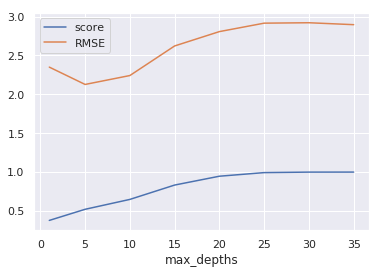

In [81]:
max_depths = [1,5,10,15,20,25,30,35]

scores = []
RMSEs = []
for md in max_depths:
  dt = tree.DecisionTreeRegressor(max_depth = md)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  score = dt.score(X_train, y_train)
  scores.append(score)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  RMSEs.append(RMSE)

ax = plt.gca()
ax.plot(max_depths, scores, label = 'score')
ax.plot(max_depths, RMSEs, label = 'RMSE')

plt.legend()
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
# plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()

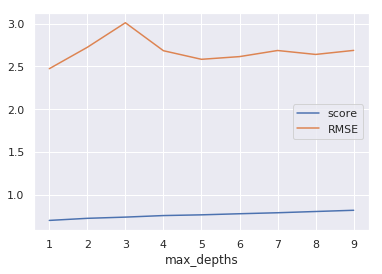

In [66]:
max_depths = [1,2,3,4,5,6,7,8,9]

scores = []
RMSEs = []
for md in max_depths:
  dt = tree.DecisionTreeClassifier(max_depth = md)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  score = dt.score(X_train, y_train)
  scores.append(score)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  RMSEs.append(RMSE)

ax = plt.gca()
ax.plot(max_depths, scores, label = 'score')
ax.plot(max_depths, RMSEs, label = 'RMSE')

plt.legend()
# ax.set_xscale('log')
# ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('max_depths')
# plt.ylabel('scores')
# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()

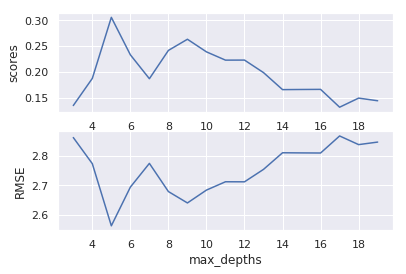

In [9]:
max_depths = range(3,20,1)

scores = []
RMSEs = []
for md in max_depths:
  dt = tree.DecisionTreeClassifier(max_depth = md)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  score = r2_score(y_test, y_pred)
  scores.append(score)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  RMSEs.append(RMSE)
  
# plt.subplot(211)

ax = plt.gca()

ax1=plt.subplot(2, 1, 1)
ax1.plot(max_depths, scores, label = 'score')
plt.xlabel('max_depths')
plt.ylabel('scores')

ax2=plt.subplot(2,1,2)
ax2.plot(max_depths, RMSEs, label = 'RMSE')
plt.xlabel('max_depths')
plt.ylabel('RMSE')

# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()

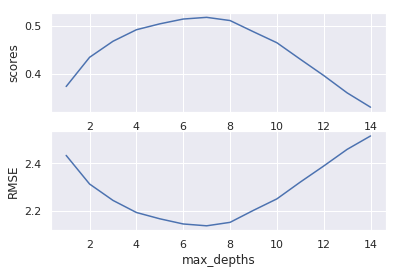

In [10]:
max_depths = range(1,15,1)

scores = []
RMSEs = []
for md in max_depths:
  dt = tree.DecisionTreeRegressor(max_depth = md)
  dt.fit(X_train, y_train)
  y_pred = dt.predict(X_test)
  score = r2_score(y_test, y_pred)
  scores.append(score)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  RMSEs.append(RMSE)
  
# plt.subplot(211)

ax = plt.gca()

ax1=plt.subplot(2, 1, 1)
ax1.plot(max_depths, scores, label = 'score')
plt.xlabel('max_depths')
plt.ylabel('scores')

ax2=plt.subplot(2,1,2)
ax2.plot(max_depths, RMSEs, label = 'RMSE')
plt.xlabel('max_depths')
plt.ylabel('RMSE')

# plt.title('Ridge coefficients as a function of the regularization')
# plt.axis('tight')
plt.show()

In [11]:
dt = tree.DecisionTreeRegressor(max_depth = 7)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

2.137303708860039
0.5171504348384208


In [0]:
max_depths = range(1,15,1)

scores = []
RMSEs = []
for md in max_depths:
  dt = tree.DecisionTreeRegressor(max_depth = md)
  score , RMSE = rmse_score(dt, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

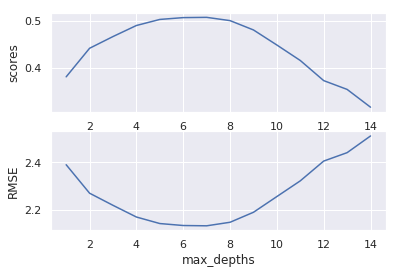

In [69]:
plot_score_rmse(max_depths, 'max_depths', scores, RMSEs)

In [0]:
def get_best(scores,RMSEs,ranges):
  max_scores = max(scores)
  index = scores.index(max_scores)
  print('max scores: ', max_scores,'\nmin RMSE: ',min(RMSEs),'\nthe best max_depths:',ranges[index])

In [81]:
get_best(scores,RMSEs,max_depths)

max scores:  0.5067496687431884 
min RMSE:  2.1336881190324974 
the best max_depths: 7


## Random Forest Regression

In [45]:

rf = RandomForestRegressor(n_estimators=10000)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
print("重要性：",importances)

重要性： [1.87926573e-03 1.72690933e-02 2.97017127e-03 5.36911983e-02
 1.51885930e-01 4.65874749e-01 5.45156531e-02 5.70334949e-02
 7.71114098e-02 6.54648515e-04 1.08776296e-02 8.83650869e-03
 3.14606521e-04 8.54145403e-03 9.10560679e-03 1.06315474e-02
 1.21384208e-02 9.18863576e-03 1.10530397e-02 1.40757905e-02
 9.01969668e-03 9.81670650e-03 3.51474347e-03]


AttributeError: ignored

 1) negative_ratings               0.465875
 2) positive_ratings               0.151886
 3) price                          0.077111
 4) median_playtime                0.057033
 5) average_playtime               0.054516
 6) achievements                   0.053691
 7) platforms                      0.017269
 8) Indie                          0.014076
 9) Free                           0.012138
10) Adventure                      0.011053
11) STC                            0.010878
12) Action                         0.010632
13) Casual                         0.009817
14) Strategy                       0.009189
15) Cloud                          0.009106
16) RPG                            0.009020
17) PCS                            0.008837
18) Player                         0.008541
19) Racing                         0.003515
20) required_age                   0.002970
21) english                        0.001879
22) VAC                            0.000655
23) ISS                         

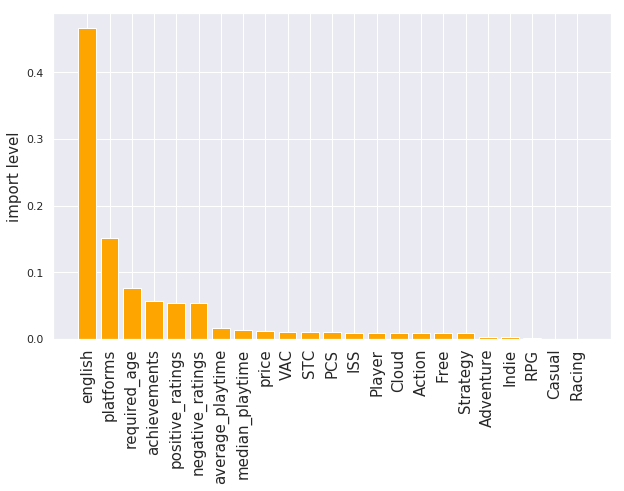

In [50]:
feat_labels = cols
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):

    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
 
 
# 筛选变量（选择重要性比较高的变量）
threshold = 0.15
x_selected = X_train[:,importances > threshold]
 
# 可视化

plt.figure(figsize=(10,6))
# plt.title("红酒的数据集中各个特征的重要程度",fontsize = 18)
plt.ylabel("import level",fontsize = 15,rotation=90)
plt.rcParams['font.sans-serif'] = ["SimHei"]
plt.rcParams['axes.unicode_minus'] = False
for i in range(len(cols)):
    plt.bar(i,importances[indices[i]],color='orange',align='center')
    plt.xticks(np.arange(len(cols)),cols,rotation=90,fontsize=15)
plt.show()

In [0]:
cols_sel = ['english', 'platforms', 'required_age', 'achievements',	'positive_ratings',	'negative_ratings']

X = st[cols].values
y = st['owners'].values
original_indexes = st['appid'].values

train_size = 20000
X_train, X_test, y_train, y_test, ind_train, ind_test = \
        train_test_split(X, y, original_indexes, train_size=train_size, test_size=len(y)-train_size)

In [76]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = dt.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.5238040551811682
0.7452488640594199


In [78]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = dt.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1.4821911008247073
0.7500254562453164


In [0]:
rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    score = r2_score(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)

In [0]:
def rmse_score(regressor, X_train, y_train,X_test,y_test):
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  score = r2_score(y_test, y_pred)
  MSE = mean_squared_error(y_test, y_pred)
  RMSE = np.sqrt(MSE)
  return score,RMSE


def DecTreeParas(X_train, y_train,X_test,y_test, ranges, para):

  scores = []
  RMSEs = []

  for i in ranges:
    params = {
        para: i
    }
    dt = DecisionTreeRegressor(**params)
    score, RMSE = rmse_score(rf, X_train, y_train,X_test,y_test)
    scores.append(score)
    RMSEs.append(RMSE)
  return scores, RMSEs

  
def RanForParas(X_train, y_train,X_test,y_test, ranges, para):

  scores = []
  RMSEs = []

  for i in ranges:
    params = {
        'n_estimators':50,
        para: i
    }
    rf = RandomForestRegressor(**params)
    score, RMSE = rmse_score(rf, X_train, y_train,X_test,y_test)
    scores.append(score)
    RMSEs.append(RMSE)
  return scores, RMSEs


def plot_score_rmse(x,x_label,scores,RMSEs):
  ax = plt.gca()

  ax1=plt.subplot(2, 1, 1)
  ax1.plot(x, scores, label = 'score')
  plt.xlabel(x_label)
  plt.ylabel('scores')

  ax2=plt.subplot(2,1,2)
  ax2.plot(x, RMSEs, label = 'RMSE')
  plt.xlabel(x_label)
  plt.ylabel('RMSE')

  plt.show()
  
  
def get_results(scores,RMSEs,x,x_label):
  get_best(scores,RMSEs,x)
  plot_score_rmse(x, x_label, scores, RMSEs)

In [0]:
n_estimator = range(10,200,20)

scores = []
RMSEs = []

for ne in n_estimator:
  rf = RandomForestRegressor(n_estimators = ne
                             , min_samples_split=50, min_samples_leaf=10, max_depth=8, random_state=10)
  score , RMSE = rmse_score(rf, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

In [0]:
get_best(scores,RMSEs,n_estimator)
plot_score_rmse(n_estimator, 'n_estimator', scores, RMSEs)

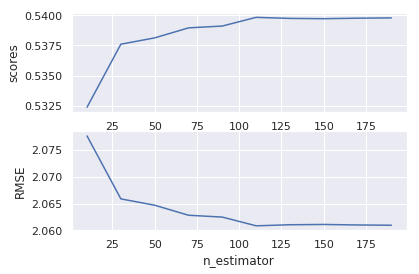

In [28]:
plot_score_rmse(n_estimator, 'n_estimator', scores, RMSEs)

In [0]:
max_depths = range(3,20,2)

scores = []
RMSEs = []

for md in max_depths:
  rf = RandomForestRegressor(n_estimators = 50, max_depth = md)
  score , RMSE = rmse_score(rf, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

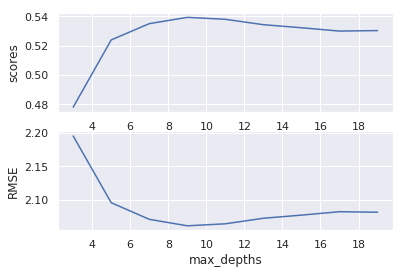

In [18]:
plot_score_rmse(max_depths, 'max_depths', scores, RMSEs)

In [0]:
min_samples_splits = range(10,101,10)

scores = []
RMSEs = []

for mss in min_samples_splits:
  rf = RandomForestRegressor(n_estimators = 50, max_depth = 9, min_samples_split = mss)
  score , RMSE = rmse_score(rf, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

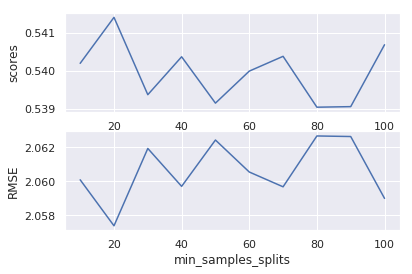

In [30]:
plot_score_rmse(min_samples_splits, 'min_samples_splits', scores, RMSEs)

In [0]:
min_samples_leaves = range(1,101,10)

scores = []
RMSEs = []

for msl in min_samples_leaves:
  rf = RandomForestRegressor(n_estimators = 50, max_depth = 9, min_samples_split = 20, min_samples_leaf = msl)
  score , RMSE = rmse_score(rf, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

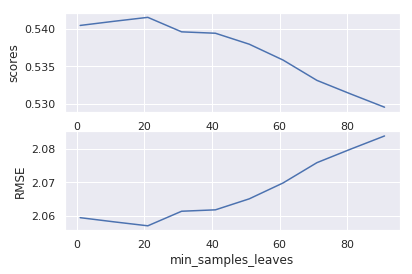

In [34]:
plot_score_rmse(min_samples_leaves, 'min_samples_leaves', scores, RMSEs)

In [0]:
max_feature = range(1,25,2)

scores = []
RMSEs = []

for mf in max_feature:
  rf = RandomForestRegressor(n_estimators = 50, max_depth = 9, min_samples_split = 20, min_samples_leaf = 20, max_features = mf)
  score , RMSE = rmse_score(rf, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)
  

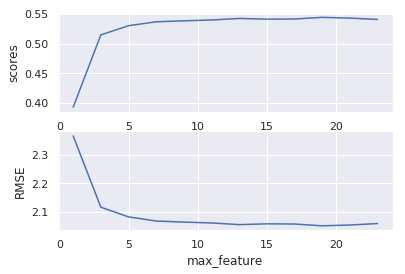

In [62]:
plot_score_rmse(max_feature, 'max_feature', scores, RMSEs)

In [67]:
params = {
        'n_estimators': 110,
        'max_depth': 9,
        'min_samples_split': 20,
        'min_samples_leaf': 20,
        'max_features': 19
    }

rf = RandomForestRegressor(**params)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)

# print(dt.score(X_train, y_train))
# print(lr.coef_)
print(RMSE)
print(r2_score(y_test, y_pred))

2.0548540658371004
0.5425248841645653


In [0]:
max_depths = range(3,20,2)
scores, RMSEs = RanForParas(X_train, y_train,X_test,y_test, max_depths, 'max_depth')

max scores:  0.5408403854733261 
min RMSE:  2.058633745165594 
the best max_depths: 11


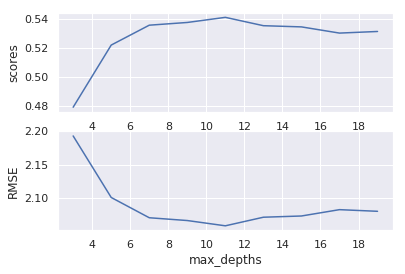

In [106]:
get_best(scores,RMSEs,max_depths)
plot_score_rmse(max_depths, 'max_depths', scores, RMSEs)

max scores:  0.5408403854733261 
min RMSE:  2.058633745165594 
the best max_depths: 11


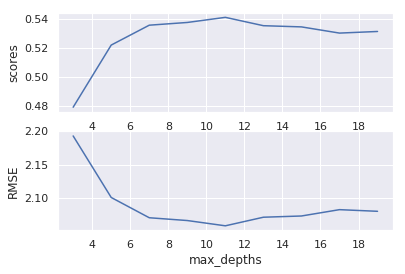

In [109]:
get_results(scores,RMSEs,max_depths,'max_depths')

## Extra Trees Regressor

## Gradient Boosting Regression

In [0]:
learning_rates = [.1,.6,1.1,1.6,2.1,2.6,3.1,3.6,4.1,4.6,5.1,5.6]

scores = []
RMSEs = []

for lr in learning_rates:
  gbr = GradientBoostingRegressor(learning_rate = lr)
  score , RMSE = rmse_score(gbr, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

In [87]:
get_best(scores,RMSEs,learning_rates)

max scores:  0.5339137845400979 
min RMSE:  2.074103266995491 
the best max_depths: 0.1


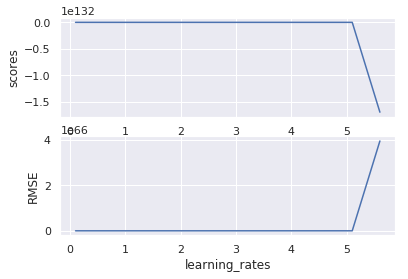

In [89]:
plot_score_rmse(learning_rates, 'learning_rates', scores, RMSEs)

In [0]:
n_estimator = range(10,200,20)

scores = []
RMSEs = []

for ne in n_estimator:
  gbr = GradientBoostingRegressor(n_estimators = ne)
  score , RMSE = rmse_score(gbr, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

max scores:  0.5369579064604604 
min RMSE:  2.067318936015868 
the best max_depths: 190


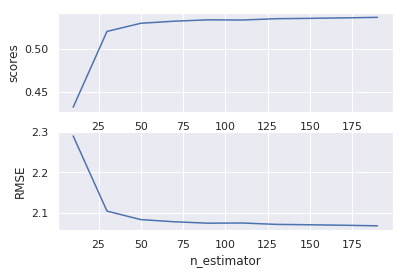

In [91]:
get_best(scores,RMSEs,n_estimator)
plot_score_rmse(n_estimator, 'n_estimator', scores, RMSEs)

In [0]:
max_depths = range(3,8,1)

scores = []
RMSEs = []

for md in max_depths:
  gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = md)
  score , RMSE = rmse_score(gbr, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

max scores:  0.5400650314061508 
min RMSE:  2.0603711549103885 
the best max_depths: 4


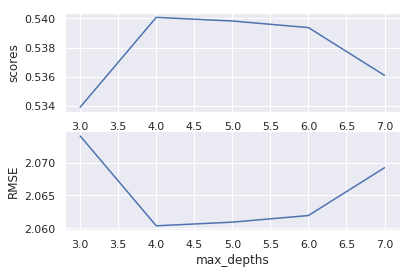

In [96]:
get_best(scores,RMSEs,max_depths)
plot_score_rmse(max_depths, 'max_depths', scores, RMSEs)

In [0]:
min_samples_splits = range(10,101,10)

scores = []
RMSEs = []

for mss in min_samples_splits:
  gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 4, min_samples_split = mss)
  score , RMSE = rmse_score(gbr, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

max scores:  0.5416800040138312 
min RMSE:  2.0567506767323667 
the best max_depths: 20


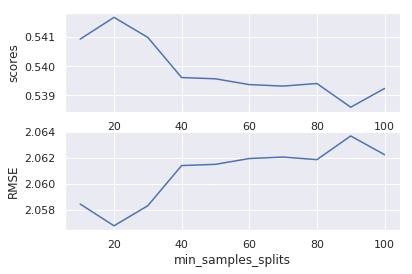

In [98]:
get_best(scores,RMSEs,min_samples_splits)
plot_score_rmse(min_samples_splits, 'min_samples_splits', scores, RMSEs)

In [0]:
min_samples_leaves = range(1,101,10)

scores = []
RMSEs = []

for msl in min_samples_leaves:
  gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 4, min_samples_split = 20, min_samples_leaf = msl)
  score , RMSE = rmse_score(gbr, X_train, y_train, X_test, y_test)
  scores.append(score)
  RMSEs.append(RMSE)

In [0]:
get_best(scores,RMSEs,min_samples_leaves)
plot_score_rmse(min_samples_leaves, 'min_samples_leaves', scores, RMSEs)